# Simulated Data

In [9]:
# imports
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.formula.api import OLS
import statsmodels.api as sm

from eegr import sim_data as sd
from eegr import fit_bucket as fb
import matplotlib.pyplot as plt
import statsmodels.graphics.regressionplots as sgr
import seaborn as sns

### Examining dataframe

#### Creating sample dataframe

In [2]:
epoch_p = (1,6)
time_p = (0,9,1)
cat_p = [(0,9),(2,10),(5,2)]
cont_p = [(0,1)]

In [3]:
sample_df = sd.df_gen(epoch_p=epoch_p, time_p=time_p, cat_p=cat_p, cont_p=cont_p)

In [4]:
sample_df;

In [5]:
times = sample_df.index.levels[sample_df.index.names.index('Time')].tolist()
times = np.concatenate([np.tile(x,int(len(sample_df)/len(times))) for x in times])
sample_df['times'] = times

In [7]:
sample_df.columns

Index(['cat', 'cont_1_range0,1', 'data', 'times'], dtype='object')

#### making fit_grids

In [6]:
LHS = ["data"]
RHS = "cat"
fit_grids = fb.make_fit_table(sample_df,LHS,RHS)

subid: testing1


In [8]:
ols('data ~ cat', data=sample_df).fit().params

Intercept        36.0
cat[T.L_2_10]     6.0
cat[T.L_5_2]    -23.0
dtype: float64

In [7]:
fit_grids[0][0]

array([array([(([5.396491e-16, 2.000000e+00, 5.000000e+00], [5.3593103e-16, 7.5792090e-16, 7.5792090e-16], [[-6.2804433e-16,  1.7073424e-15], [ 2.0000000e+00,  2.0000000e+00], [ 5.0000000e+00,  5.0000000e+00]]), (0, [2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29, 2.6927068e-29], [-6.745613e-16,  0.000000e+00, -2.220446e-15, -6.745613e-16,  0.000000e+00, -2.220446e-15, -6.745613e-16,  0.000000e+00, -2.220446e-15, -6.745613e-16,  0.000000e+00, -2.220446e-15, -6.745613e-16,  0.000000e+00, -2.220446e-15], [-1.0778313e-18, -8.4044222e+27, -3.5103681e-20, -2.7783270e-14, -2.1783692e-16,            nan, -1.0778313e-18, -8.4044222e+27, -3.5103681e-20, -2.7783270e-14, -2.1783692e-16,            nan, -1.0778313e-18, -8.4044222e+27, -3.5103681e-20], [1.1488882e-30, 1.1488882e-30, 1.1488882e-30, 1.1488882e-30, 1.1488882e-30, 1.1488882e-3

Examining the coefficients

In [91]:
len(fit_grids)

1

In [94]:
fit_grids[0]['fit']['coef']

array([[ 0. ,  3.2],
       [ 9. ,  3.4],
       [18. ,  3.6],
       [27. ,  3.8],
       [36. ,  4. ],
       [45. ,  4.2],
       [54. ,  4.4],
       [63. ,  4.6],
       [72. ,  4.8]], dtype=float32)

### Plotting

Completing times x data

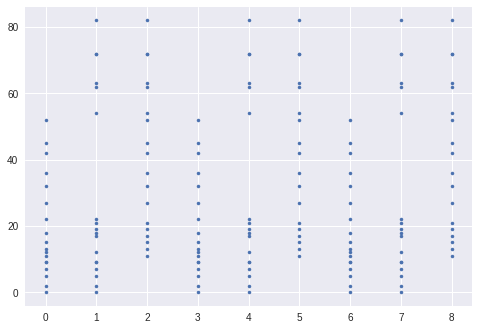

In [29]:
plt.plot(sample_df['times'],sample_df['data'],'.')

Strip plotting based on categorical data

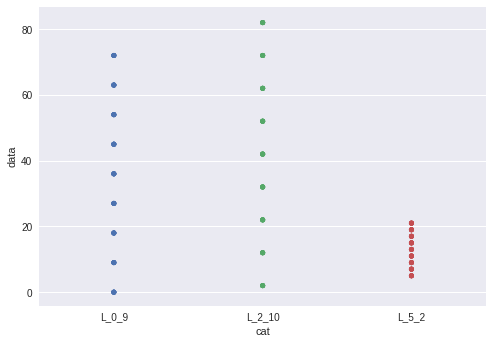

In [23]:
sns.stripplot(x='cat', y='data', data=sample_df)

This doesn't work...

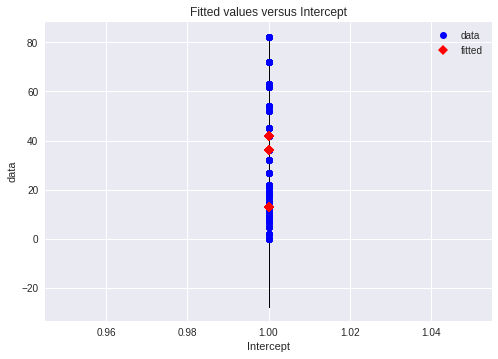

In [37]:
results = ols('data ~ cat', data=sample_df).fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)

This is interesting

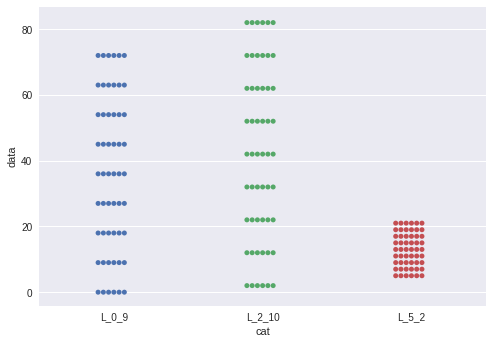

In [40]:
sns.swarmplot(x='cat', y='data', data=sample_df)

I'm not sure how this helps

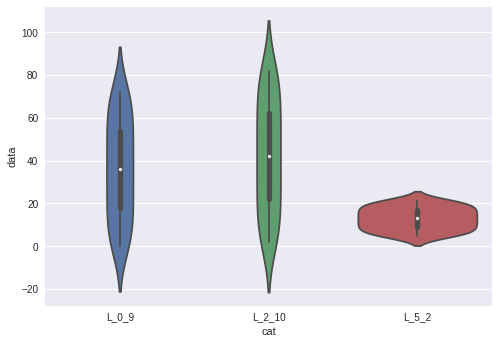

In [41]:
sns.violinplot(x='cat', y='data', data=sample_df)

Pointplot is interesting... does this work for calculating

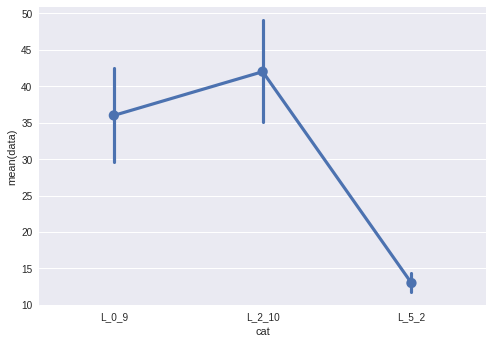

In [44]:
sns.pointplot(x='cat', y='data', data=sample_df)

??? Unsure how this is helpful with multiple times

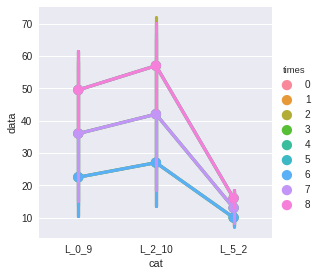

In [47]:
sns.factorplot(x='cat', y='data', hue='times', data=sample_df)

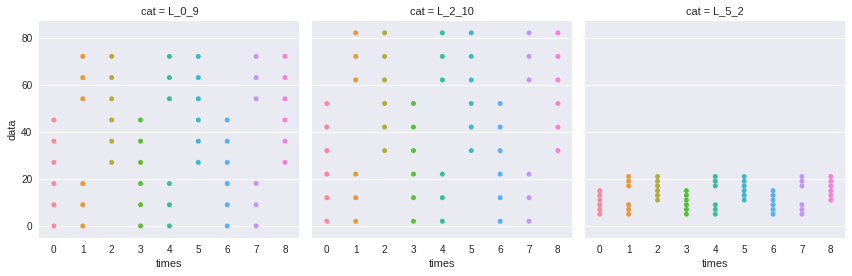

In [60]:
sns.factorplot(x='times', y='data', col='cat', data=sample_df, kind='swarm')

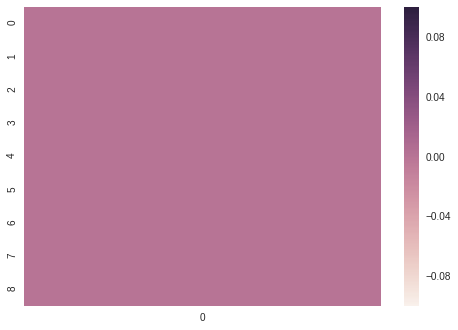

In [55]:
sns.heatmap(fit_grids[0]['diag']['cooks_d'], annot=False, fmt="g")